# Clustering Heart Disease Patients

## Importing packages and loading in dataset

In [71]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors

In [2]:
# import from PC
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
cleve = pd.read_csv(r'C:\Users\natha\Portfolio Projects\Coursera Projects\Unsupervised Machine Learning Project\processed.cleveland.data', names = col_names)
va = pd.read_csv(r'C:\Users\natha\Portfolio Projects\Coursera Projects\Unsupervised Machine Learning Project\processed.va.data', names = col_names)
switz = pd.read_csv(r'C:\Users\natha\Portfolio Projects\Coursera Projects\Unsupervised Machine Learning Project\processed.switzerland.data', names = col_names)
hung = pd.read_csv(r'C:\Users\natha\Portfolio Projects\Coursera Projects\Unsupervised Machine Learning Project\reprocessed.hungarian.data', names = col_names,  sep=" ")
frames = [cleve, va, switz, hung]
df = pd.concat(frames)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [18]:
# import for mac
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
cleve = pd.read_csv(r'/Users/nathan/Documents/Portfolio/Coursera Projects/Unsupervised Machine Learning Project/processed.cleveland.data', names = col_names)
va = pd.read_csv(r'/Users/nathan/Documents/Portfolio/Coursera Projects/Unsupervised Machine Learning Project/processed.va.data', names = col_names)
switz = pd.read_csv(r'/Users/nathan/Documents/Portfolio/Coursera Projects/Unsupervised Machine Learning Project/processed.switzerland.data', names = col_names)
hung = pd.read_csv(r'/Users/nathan/Documents/Portfolio/Coursera Projects/Unsupervised Machine Learning Project/reprocessed.hungarian.data', names = col_names, sep=" ")
frames = [cleve, va, switz, hung]
df = pd.concat(frames)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


## Exploratory Data Analysis

In [3]:
df.shape

(921, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, 0 to 294
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    float64
dtypes: float64(4), object(10)
memory usage: 107.9+ KB


In [5]:
df.describe()

,age,sex,cp,num
count,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,1.133696
std,9.424685,0.408148,0.930969,1.258942
min,28.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,1.000000
75%,60.000000,1.000000,4.000000,2.000000
max,77.000000,1.000000,4.000000,4.000000


In [6]:
df.groupby('slope').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,num
slope,,,,,,,,,,,,,
-9.0,190,190,190,190,190,190,190,190,190,190,190,190,190
1.0,154,154,154,154,154,154,154,154,154,154,154,154,154
2.0,231,231,231,231,231,231,231,231,231,231,231,231,231
3.0,22,22,22,22,22,22,22,22,22,22,22,22,22
1,49,49,49,49,49,49,49,49,49,49,49,49,49
2,114,114,114,114,114,114,114,114,114,114,114,114,114
3,41,41,41,41,41,41,41,41,41,41,41,41,41
?,119,119,119,119,119,119,119,119,119,119,119,119,119


In [7]:
df = df.replace('?', np.nan)
df = df.replace(-9.0, np.nan)
# convert all cols to numeric 
cols_numeric = df.columns
df[cols_numeric] = df[cols_numeric].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, 0 to 294
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        310 non-null    float64
 12  thal      434 non-null    float64
 13  num       920 non-null    float64
dtypes: float64(14)
memory usage: 107.9 KB


In [8]:
df.isnull().values.sum()

1772

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


<Axes: >

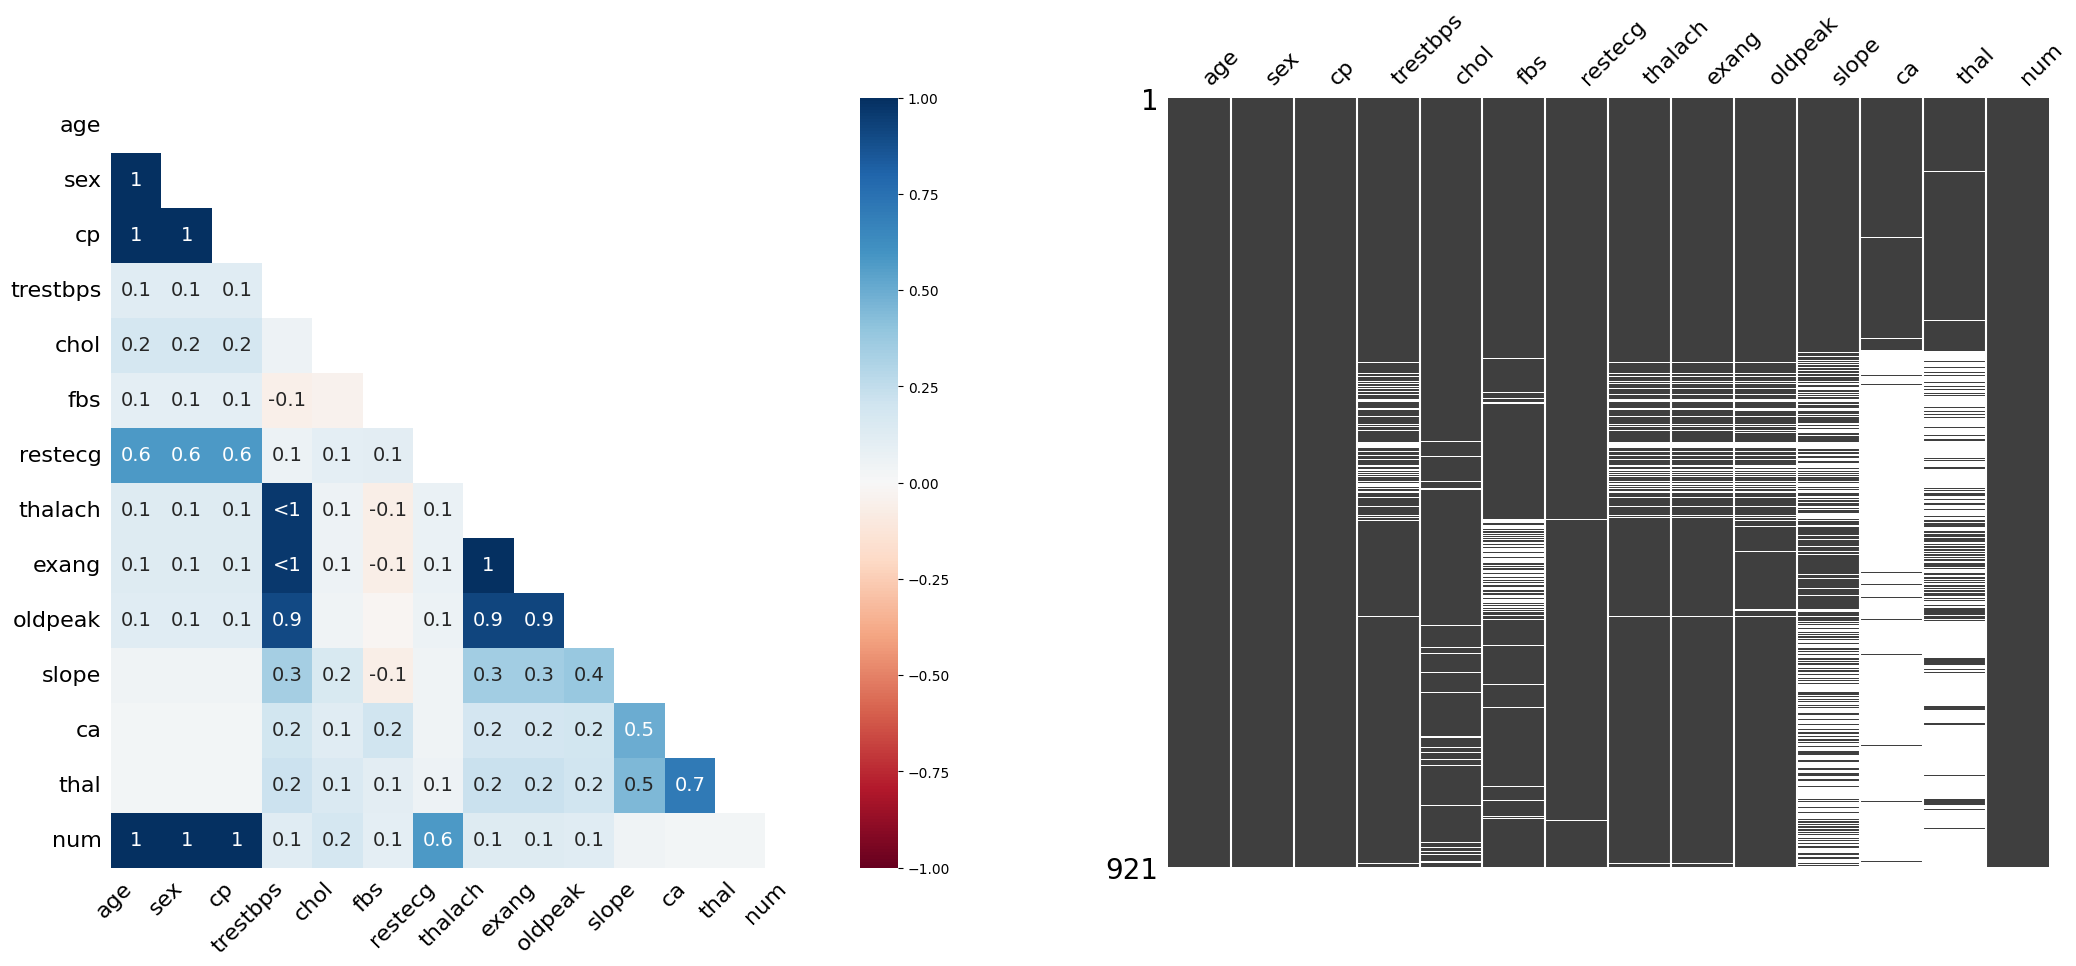

In [9]:
fig, ax = plt.subplots(figsize=(25, 10),nrows=1,ncols=2)

msno.heatmap(df, ax = ax[0])
msno.matrix(df, ax = ax[1])

In [10]:
# remove cols CA and Thal a lot of missing data
# drop all NA
df.drop(['ca', 'thal'], axis=1, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,NaN,0.0


In [11]:
# Remove NA
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 0 to 292
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       531 non-null    float64
 1   sex       531 non-null    float64
 2   cp        531 non-null    float64
 3   trestbps  531 non-null    float64
 4   chol      531 non-null    float64
 5   fbs       531 non-null    float64
 6   restecg   531 non-null    float64
 7   thalach   531 non-null    float64
 8   exang     531 non-null    float64
 9   oldpeak   531 non-null    float64
 10  slope     531 non-null    float64
 11  num       531 non-null    float64
dtypes: float64(12)
memory usage: 53.9 KB


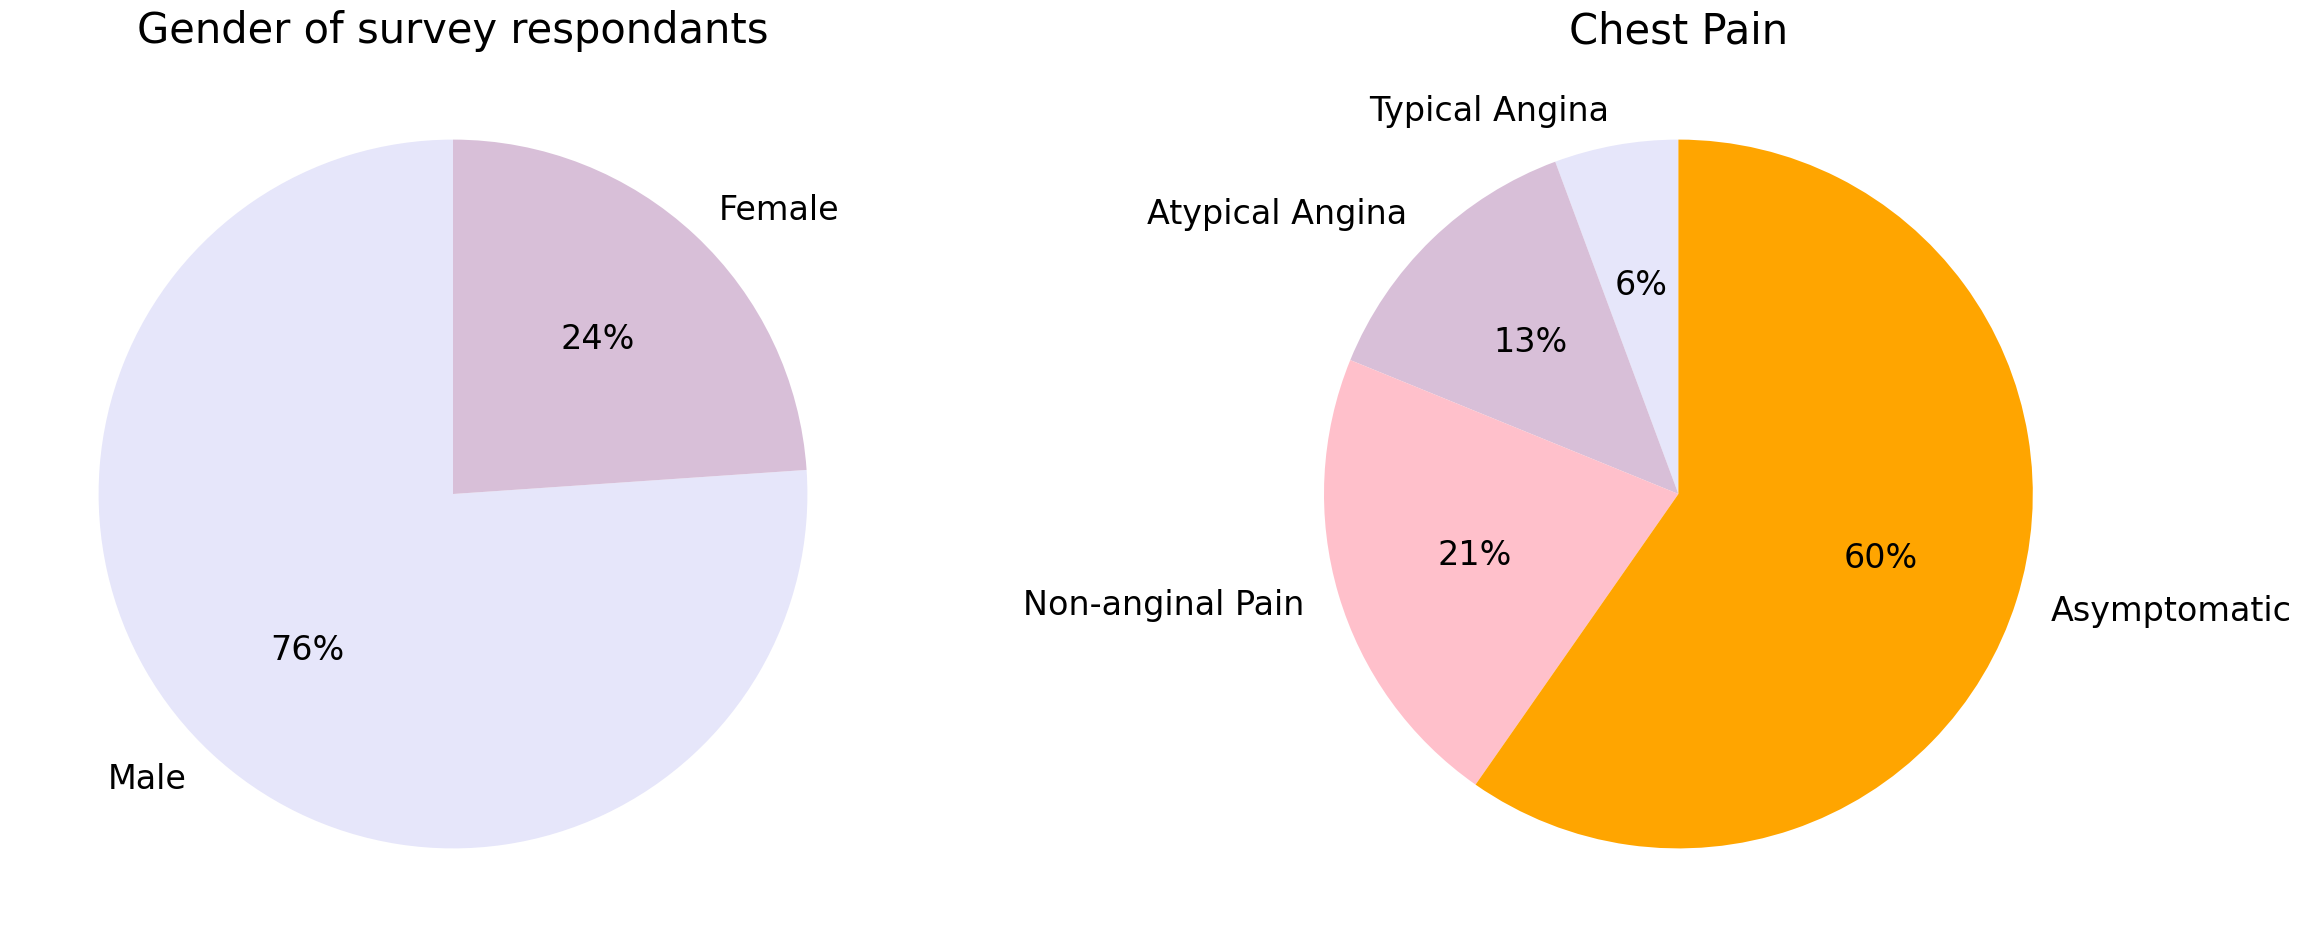

In [17]:
num_male = df[df['sex'] == 1].shape[0]
num_female = df[df['sex'] == 0].shape[0]
num_cp1 = df[df['cp'] == 1].shape[0]
num_cp2 = df[df['cp'] == 2].shape[0]
num_cp3 = df[df['cp'] == 3].shape[0]
num_cp4 = df[df['cp'] == 4].shape[0]

plt.rc('font', size=24)
fig, ax = plt.subplots(figsize=(25, 10),nrows=1,ncols=2)

ax[0].pie(
    [num_male, num_female],
    labels=['Male', 'Female'],
    startangle=90,
    autopct='%1.f%%',
    colors=['lavender', 'thistle'])
ax[0].title.set_text('Gender of survey respondants')
ax[0].title.set_size(30)

ax[1].pie(
    [num_cp1, num_cp2, num_cp3, num_cp4],
    labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'],
    startangle=90,
    autopct='%1.f%%',
    colors=['lavender', 'thistle','pink', 'orange'])
ax[1].title.set_text('Chest Pain')
ax[1].title.set_size(30)

plt.tight_layout()
plt.show()

In [18]:
# remove all observations with a 0 cholestrol serum
df= df[df['chol'] != 0]

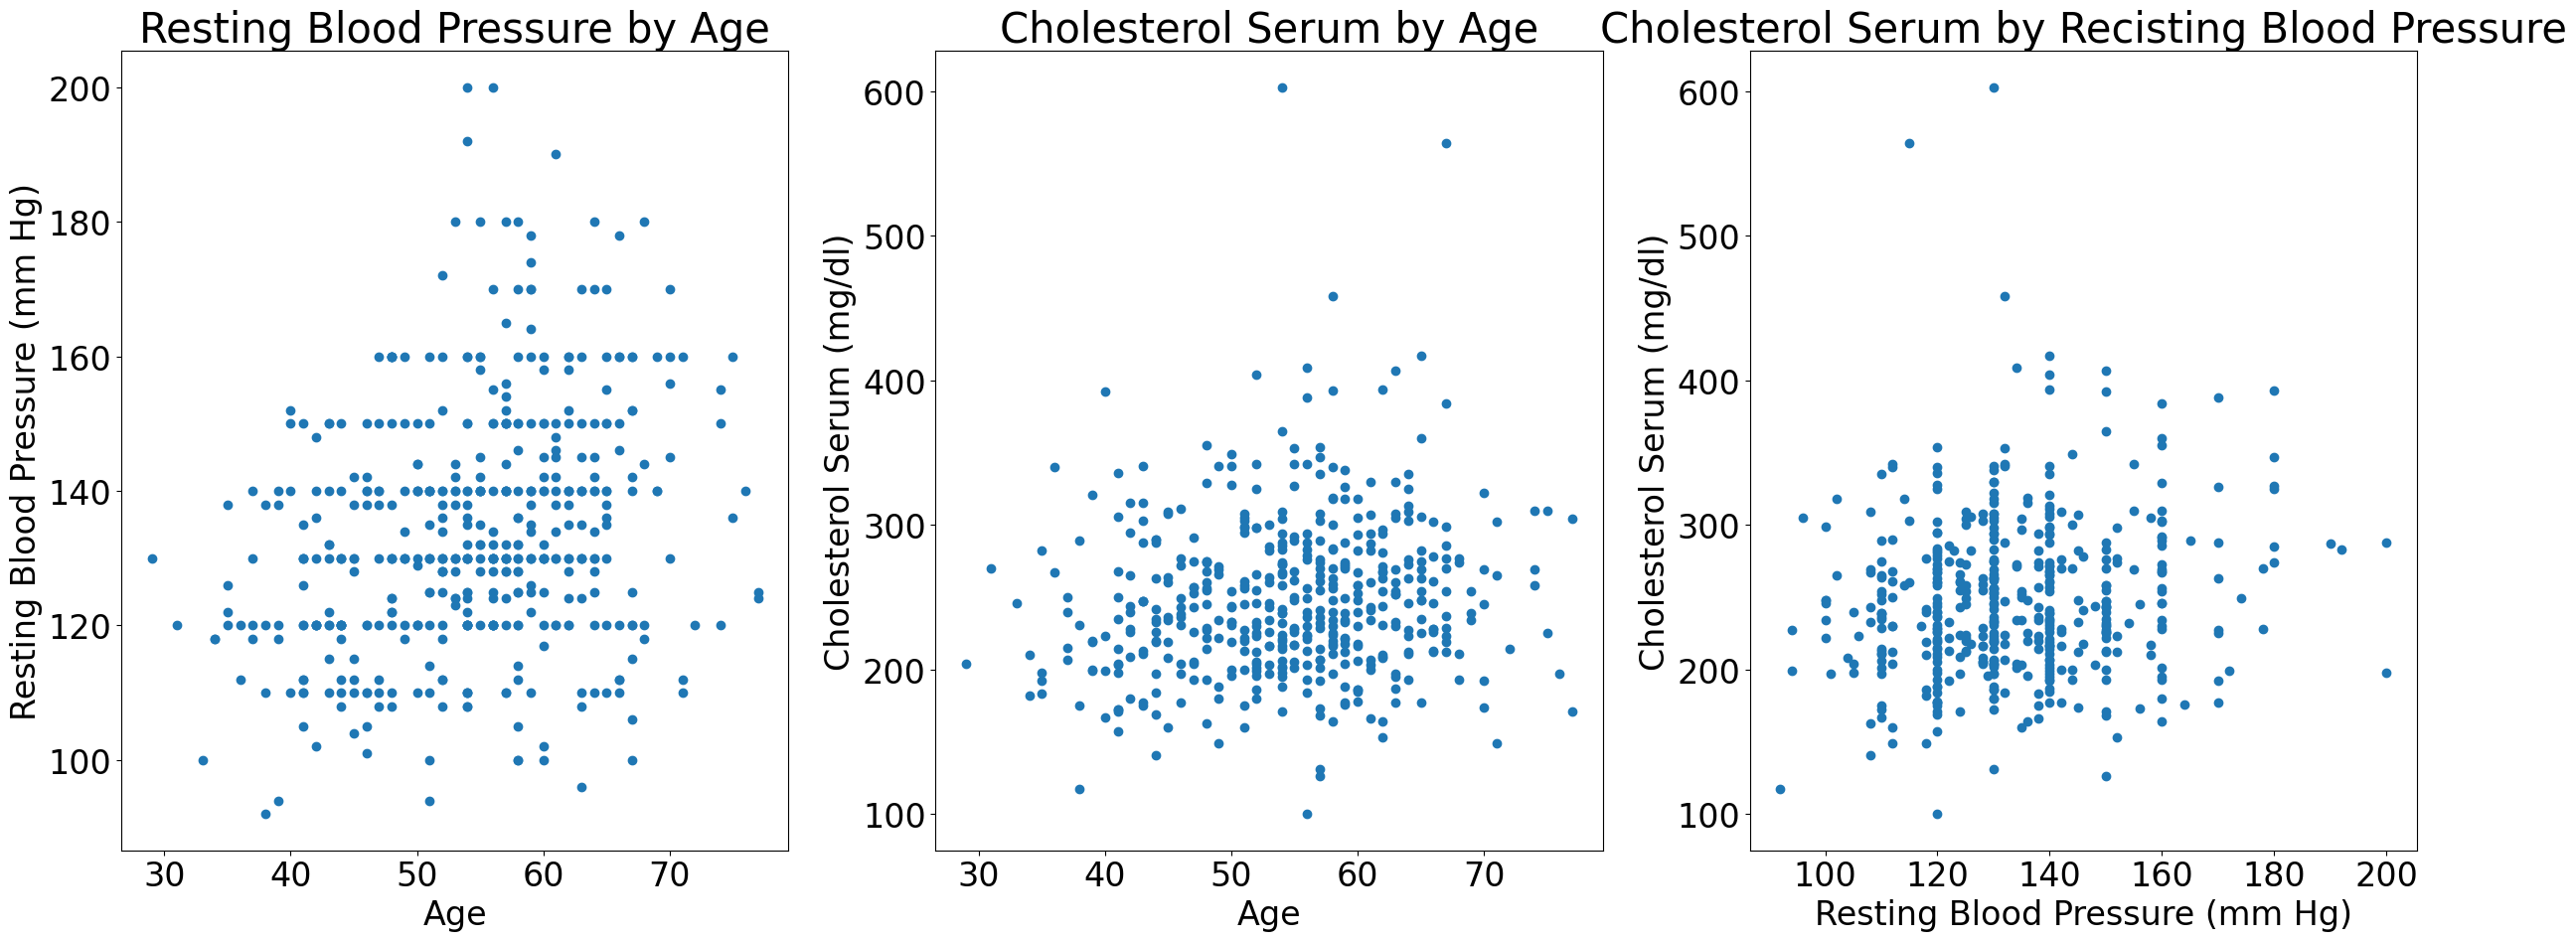

In [26]:
# scatter age, trestbps, chol
plt.rc('font', size=24)
fig, ax = plt.subplots(figsize=(25, 10),nrows=1,ncols=3)

ax[0].scatter(df['age'],df['trestbps'])
ax[0].set(title = 'Resting Blood Pressure by Age', xlabel = 'Age', ylabel ='Resting Blood Pressure (mm Hg)')
ax[0].title.set_size(30)

ax[1].scatter(df['age'], df['chol'])
ax[1].set(title ='Cholesterol Serum by Age', xlabel = 'Age', ylabel ='Cholesterol Serum (mg/dl)')
ax[1].title.set_size(30)

ax[2].scatter(df['trestbps'], df['chol'])
ax[2].set(title = 'Cholesterol Serum by Recisting Blood Pressure', xlabel ='Resting Blood Pressure (mm Hg)', 
          ylabel = 'Cholesterol Serum (mg/dl)')
ax[2].title.set_size(30)

plt.tight_layout()
plt.show()

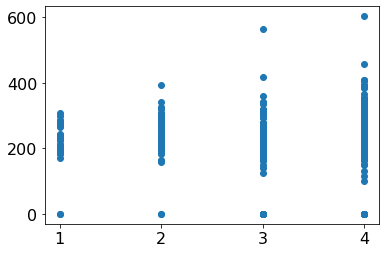

In [35]:
plt.scatter(data = df, x = 'cp', y = 'chol')

## Modelling

In [36]:
#scale variables
scale = StandardScaler()
df_scaled = scale.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
print(df_scaled.info())
print(df_scaled.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       462 non-null    float64
 1   sex       462 non-null    float64
 2   cp        462 non-null    float64
 3   trestbps  462 non-null    float64
 4   chol      462 non-null    float64
 5   fbs       462 non-null    float64
 6   restecg   462 non-null    float64
 7   thalach   462 non-null    float64
 8   exang     462 non-null    float64
 9   oldpeak   462 non-null    float64
 10  slope     462 non-null    float64
 11  num       462 non-null    float64
dtypes: float64(12)
memory usage: 43.4 KB
None
                age           sex            cp      trestbps          chol   
count  4.620000e+02  4.620000e+02  4.620000e+02  4.620000e+02  4.620000e+02  \
mean  -3.075943e-17  2.306957e-17  2.460754e-16  7.766755e-16 -1.153478e-16   
std    1.001084e+00  1.001084e+00  1.001084e+00  1.001084e+00  1.

### Kmeans Clustering

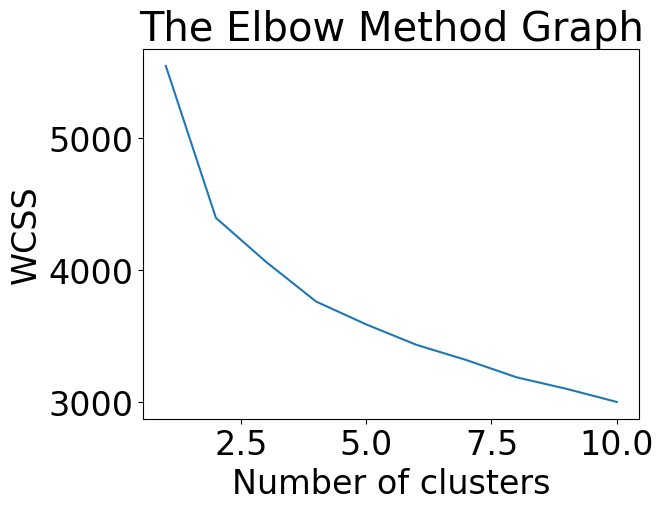

In [28]:
wcss=[]
for i in range(1,11): 
    km = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    km.fit(df_scaled)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# about 5 clusters
km = KMeans(n_clusters=5, random_state=42)
km.fit(df_scaled)

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

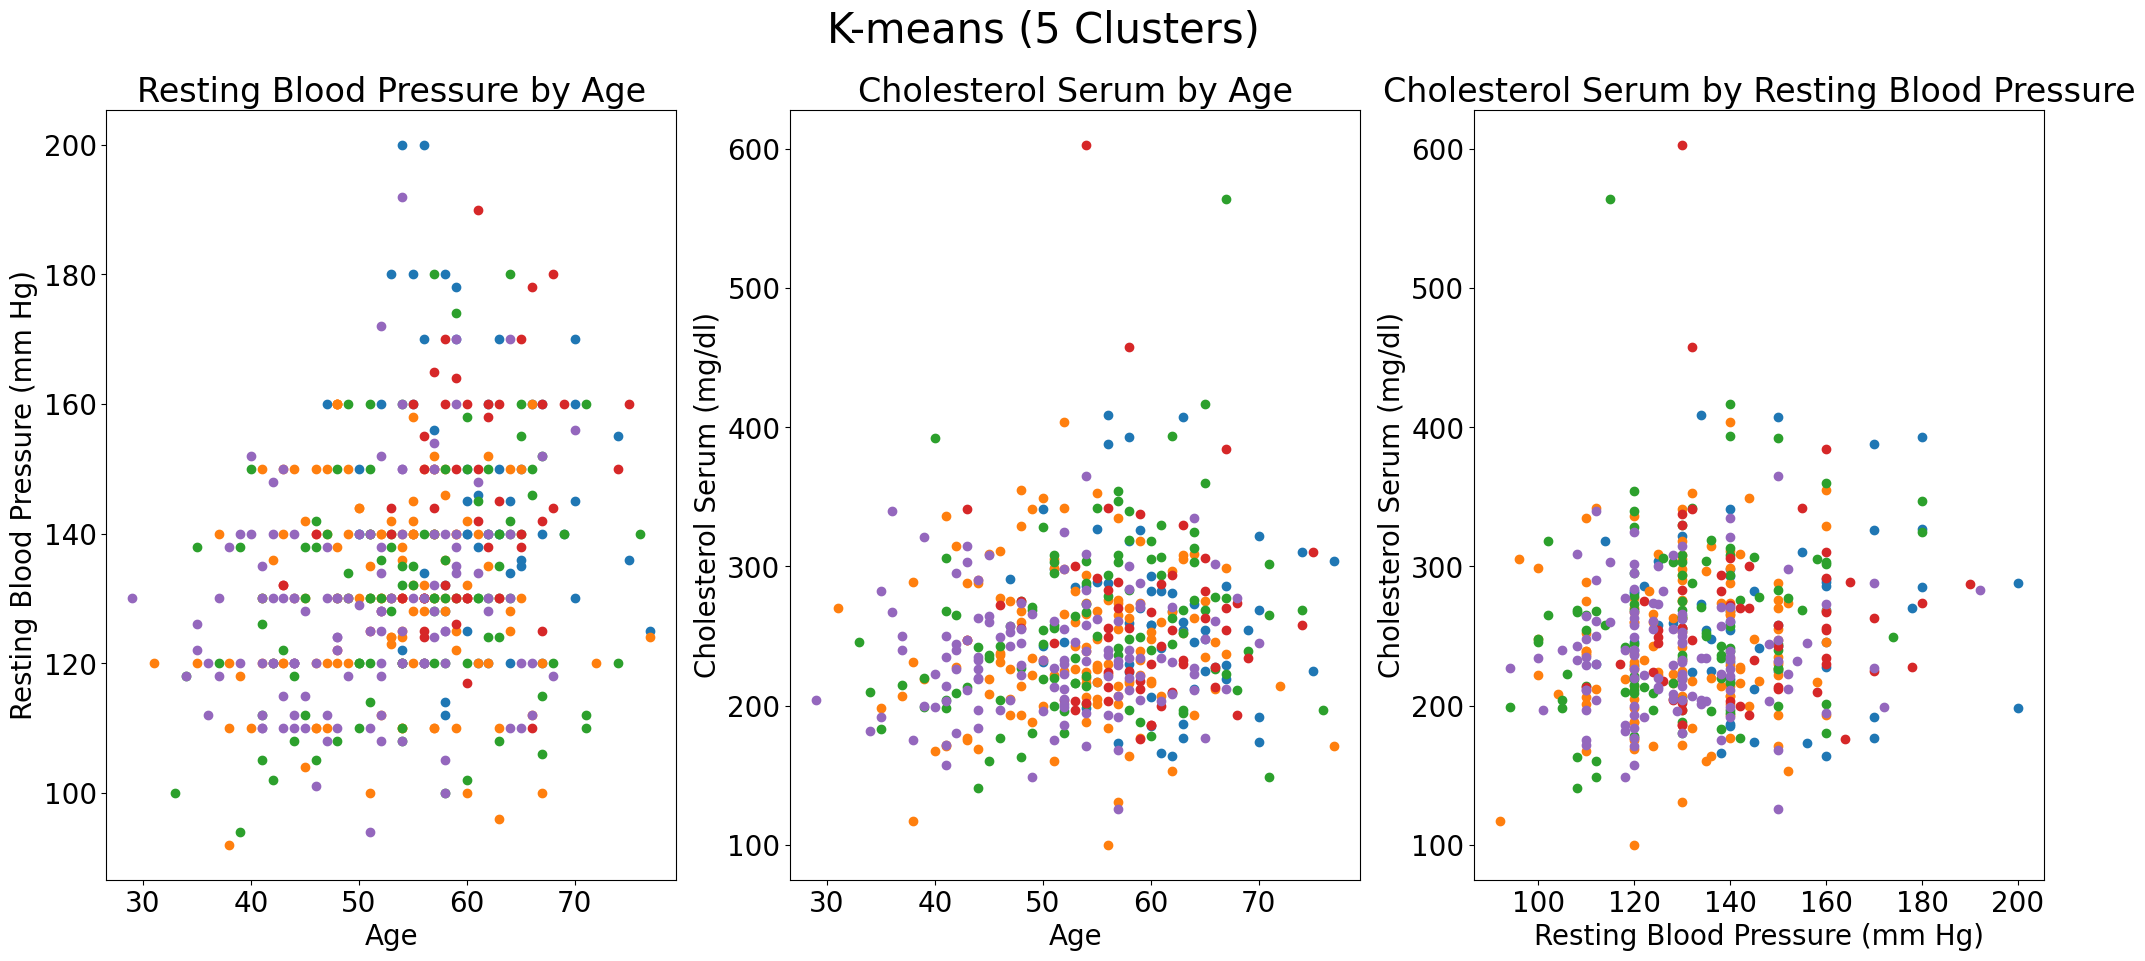

In [85]:
plt.rc('font', size=20)
fig, ax = plt.subplots(figsize=(25, 10),nrows=1,ncols=3)
fig = plt.gcf()
fig.suptitle("K-means (5 Clusters)", fontsize=30)

for label in np.unique(km.labels_):
    df_final_ = df[label == km.labels_]
    ax[0].scatter(df_final_['age'], df_final_['trestbps'], label=label)
    ax[0].set(title = 'Resting Blood Pressure by Age', xlabel = 'Age', ylabel ='Resting Blood Pressure (mm Hg)')

    ax[1].scatter(df_final_['age'], df_final_['chol'], label=label)
    ax[1].set(title ='Cholesterol Serum by Age', xlabel = 'Age', ylabel ='Cholesterol Serum (mg/dl)')
    
    ax[2].scatter(df_final_['trestbps'], df_final_['chol'], label=label)
    ax[2].set(title = 'Cholesterol Serum by Resting Blood Pressure', xlabel ='Resting Blood Pressure (mm Hg)', 
              ylabel = 'Cholesterol Serum (mg/dl)')
plt.show()

In [76]:
# Silhouette score
label=km.labels_
print(f'Silhouette Score (K-means n=5): {silhouette_score(df_scaled, label)}')

Silhouette Score (K-means n=5): 0.13022858119560754


In [90]:
# summary stats for clusters
df_km = df
df_km['Clusters'] = km.labels_
df_km.groupby('Clusters').agg(['mean','std'])

age                 sex                  cp             
               mean       std      mean       std      mean       std   
Clusters                                                                
0         60.896552  6.488018  0.844828  0.365231  3.793103  0.585156  \
1         52.928000  8.044409  0.952000  0.214626  3.824000  0.509015   
2         54.586538  9.341016  0.000000  0.000000  3.028846  0.886323   
3         59.072727  6.825482  0.909091  0.290129  3.418182  1.012714   
4         50.650000  8.657488  1.000000  0.000000  2.733333  1.001959   

            trestbps                   chol             ...     thalach   
                mean        std        mean        std  ...        mean   
Clusters                                                ...               
0         146.396552  20.060382  261.534483  57.821327  ...  131.068966  \
1         130.648000  14.989919  242.776000  52.338671  ...  123.296000   
2         130.942308  17.438840  257.711538  62.517520  ...  149.557692   
3         143.545455  17.431154  263.054545  70.647119  ...  133.690909   
4         128.700000  16.254592  236.366667  42.251932  ...  161.891667   

                        exang             oldpeak               slope   
                std      mean       std      mean       std      mean   
Clusters                                                                
0         20.302849  0.672414  0.473432  2.822414  1.174740  2.224138  \
1         18.581132  0.896000  0.306489  1.637600  0.795214  1.952000   
2         20.941355  0.230769  0.423365  0.680769  0.666694  1.509615   
3         23.865264  0.654545  0.479899  1.594545  0.910315  2.090909   
4         16.665163  0.100000  0.301258  0.523333  0.706005  1.333333   

                         num            
               std      mean       std  
Clusters                                
0         0.563296  2.810345  1.067164  
1         0.398708  1.864000  1.131257  
2         0.539601  0.221154  0.573809  
3         0.553532  1.854545  1.238550  
4         0.555089  0.333333  0.626224  

[5 rows x 24 columns]

### Hierarchical Agglomerative Clustering

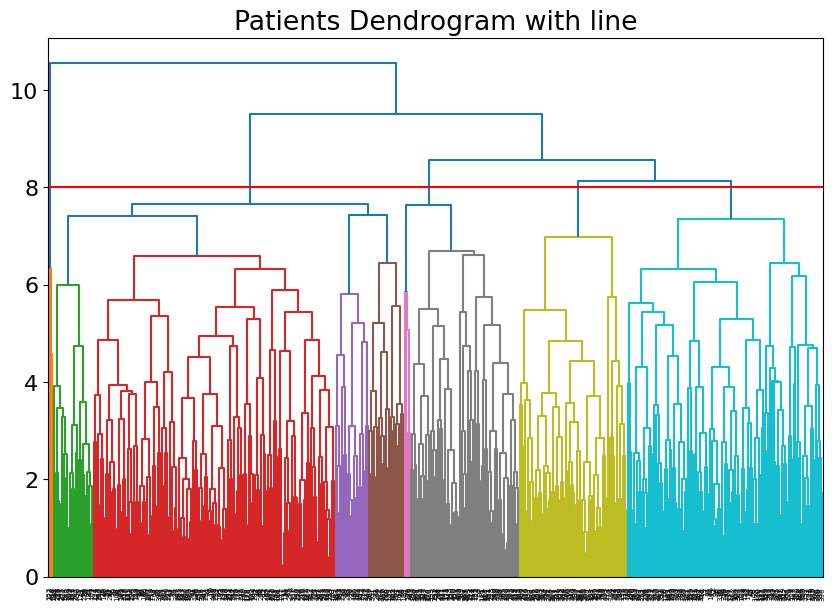

In [51]:
X = df_scaled.values
plt.figure(figsize=(10, 7))
plt.title("Patients Dendrogram with line")
dendrogram = sch.dendrogram(sch.linkage(X, 
                                        method='complete',
                                        metric="euclidean"))
plt.axhline(y = 8, color = 'r', linestyle = '-')

In [53]:
# fit the clustering
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clustering_model.fit(X)

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

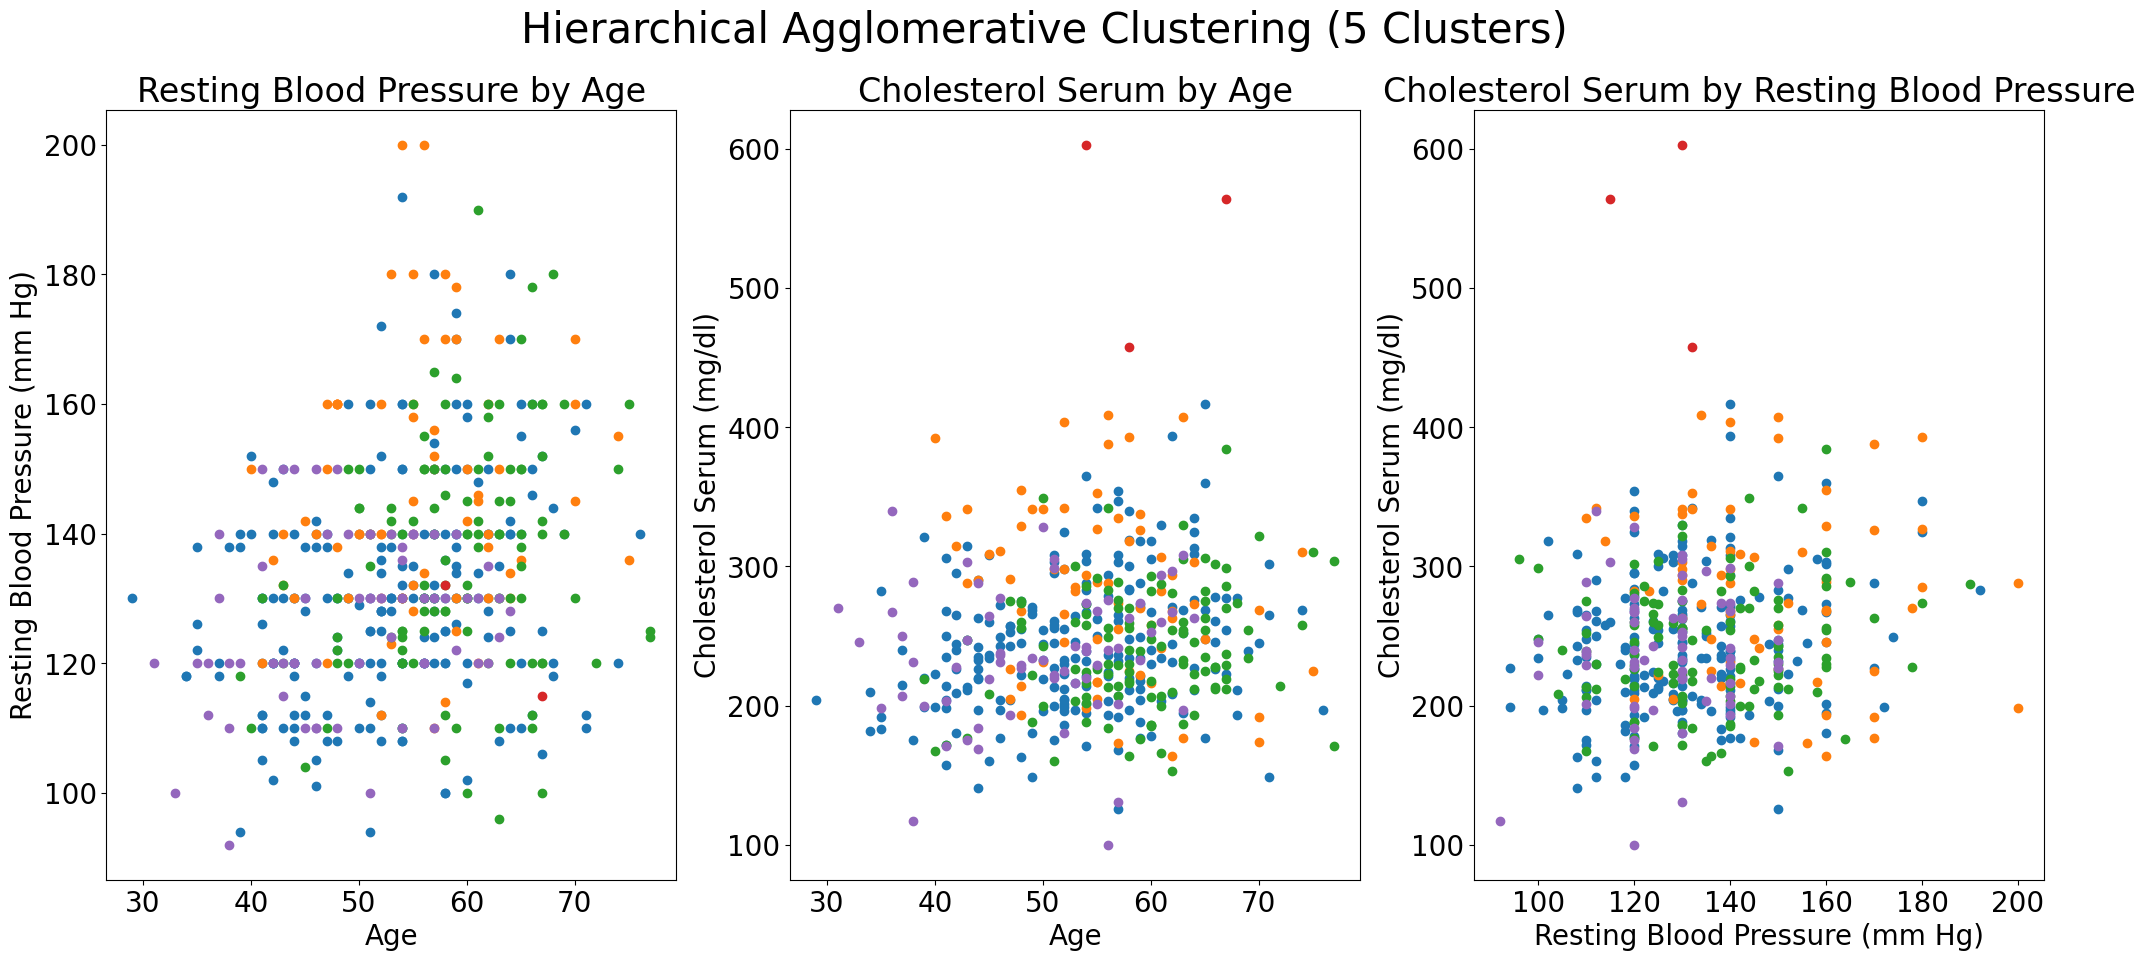

In [83]:
plt.rc('font', size=20)
fig, ax = plt.subplots(figsize=(25, 10),nrows=1,ncols=3)
fig = plt.gcf()
fig.suptitle("Hierarchical Agglomerative Clustering (5 Clusters)", fontsize=30)

for label in np.unique(clustering_model.labels_):
    df_final_ = df[label == clustering_model.labels_]
    ax[0].scatter(df_final_['age'], df_final_['trestbps'], label=label)
    ax[0].set(title = 'Resting Blood Pressure by Age', xlabel = 'Age', ylabel ='Resting Blood Pressure (mm Hg)')

    ax[1].scatter(df_final_['age'], df_final_['chol'], label=label)
    ax[1].set(title ='Cholesterol Serum by Age', xlabel = 'Age', ylabel ='Cholesterol Serum (mg/dl)')
    
    ax[2].scatter(df_final_['trestbps'], df_final_['chol'], label=label)
    ax[2].set(title = 'Cholesterol Serum by Resting Blood Pressure', xlabel ='Resting Blood Pressure (mm Hg)', 
              ylabel = 'Cholesterol Serum (mg/dl)')
plt.show()

In [78]:
# Silhouette score
label=clustering_model.labels_
print(f'Silhouette Score (Hierarchical Clustering n=5): {silhouette_score(df_scaled, label)}')

Silhouette Score (Hierarchical Clustering n=5): 0.06904165470313349


In [91]:
# summary stats for clusters
df_hc = df
df_hc['Clusters'] = clustering_model.labels_
df_hc.groupby('Clusters').agg(['mean','std'])

age                 sex                  cp             
               mean       std      mean       std      mean       std   
Clusters                                                                
0         53.071770  8.937261  0.569378  0.496352  2.837321  0.961941  \
1         55.347826  7.722820  0.710145  0.457019  3.884058  0.470801   
2         59.034188  7.457849  0.982906  0.130179  3.683761  0.726939   
3         59.666667  6.658328  0.666667  0.577350  3.666667  0.577350   
4         49.296875  8.501503  0.828125  0.380254  3.531250  0.835117   

            trestbps                   chol             ...     thalach   
                mean        std        mean        std  ...        mean   
Clusters                                                ...               
0         130.746411  17.027348  242.732057  48.530868  ...  156.937799  \
1         146.405797  19.347685  281.594203  61.040324  ...  121.869565   
2         135.666667  17.662546  240.948718  43.405038  ...  128.564103   
3         125.666667   9.291573  541.666667  75.035547  ...  118.000000   
4         126.578125  12.991822  237.078125  46.873794  ...  136.609375   

                        exang             oldpeak               slope   
                std      mean       std      mean       std      mean   
Clusters                                                                
0         19.349790  0.148325  0.356276  0.585167  0.699739  1.349282  \
1         20.042538  0.855072  0.354607  2.466667  1.229977  2.246377   
2         20.214532  0.666667  0.473432  1.644444  0.921154  1.974359   
3         45.902070  0.333333  0.577350  1.200000  0.346410  2.333333   
4         20.720067  0.843750  0.365963  1.581250  0.886920  2.031250   

                         num            
               std      mean       std  
Clusters                                
0         0.516564  0.330144  0.680145  
1         0.434057  2.681159  1.021716  
2         0.516312  2.034188  1.238266  
3         0.577350  0.666667  1.154701  
4         0.397163  1.046875  1.014650  

[5 rows x 24 columns]

### DBSCAN Clustering

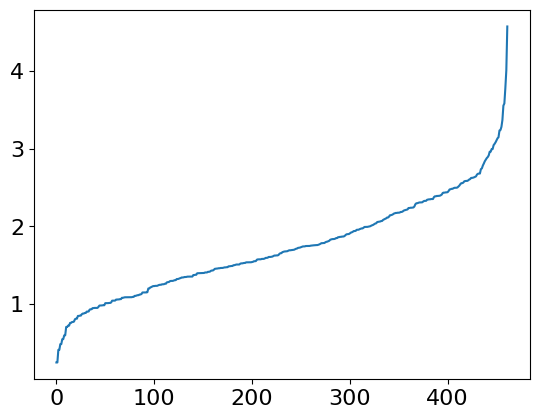

In [55]:
# optimising epsilon paramter
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

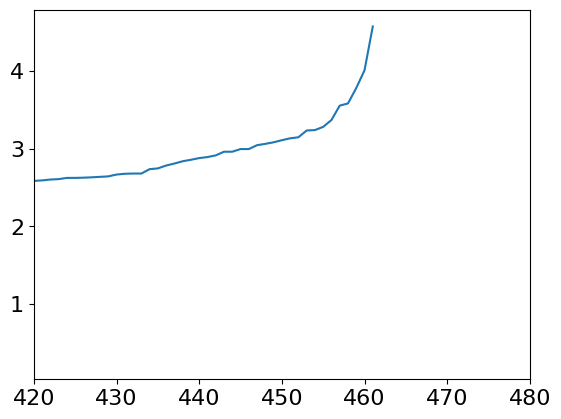

In [57]:
plt.xlim(420, 480)
plt.plot(distances)

In [59]:
# eps = 35 (on y-axis)
DBSCAN_cluster = DBSCAN(eps=3, min_samples=20).fit(X) 

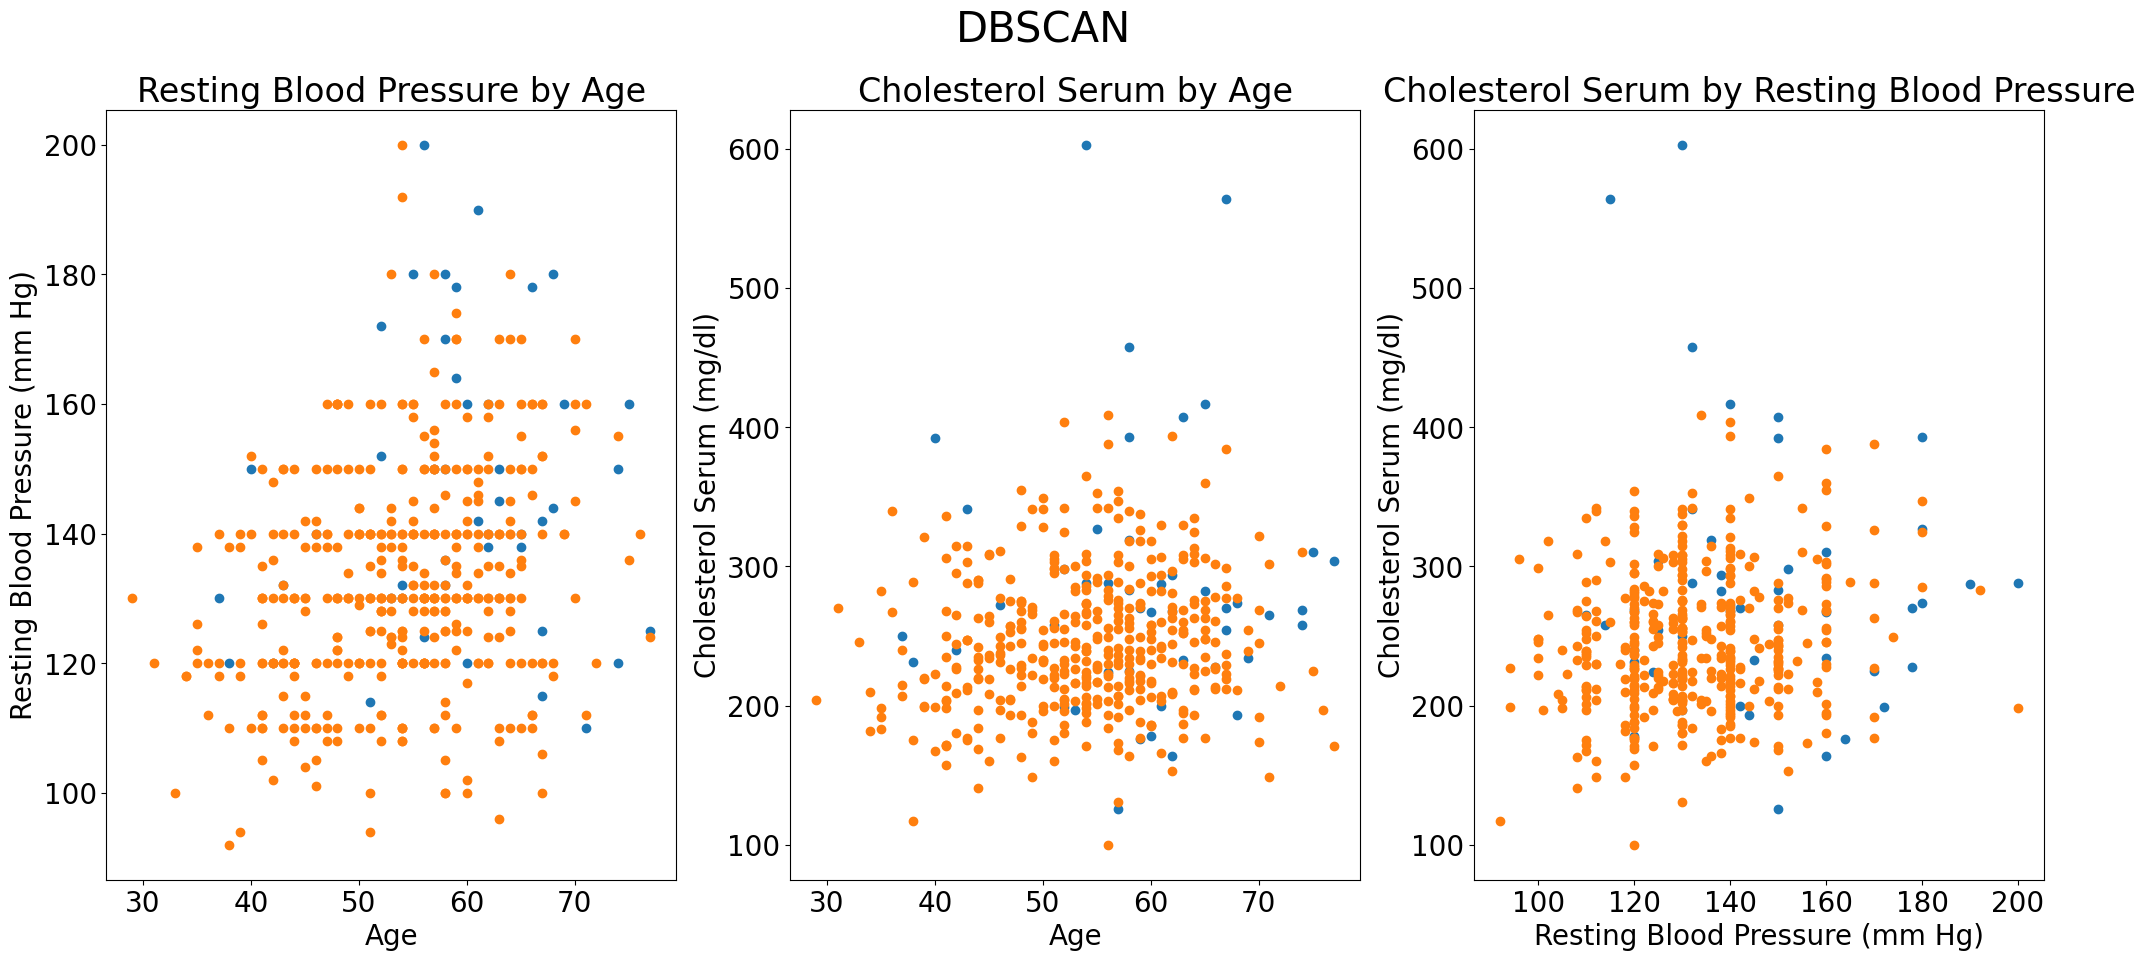

In [84]:
plt.rc('font', size=20)
fig, ax = plt.subplots(figsize=(25, 10),nrows=1,ncols=3)
fig = plt.gcf()
fig.suptitle("DBSCAN", fontsize=30)

for label in np.unique(DBSCAN_cluster.labels_):
    df_final_ = df[label == DBSCAN_cluster.labels_]
    ax[0].scatter(df_final_['age'], df_final_['trestbps'], label=label)
    ax[0].set(title = 'Resting Blood Pressure by Age', xlabel = 'Age', ylabel ='Resting Blood Pressure (mm Hg)')

    ax[1].scatter(df_final_['age'], df_final_['chol'], label=label)
    ax[1].set(title ='Cholesterol Serum by Age', xlabel = 'Age', ylabel ='Cholesterol Serum (mg/dl)')
    
    ax[2].scatter(df_final_['trestbps'], df_final_['chol'], label=label)
    ax[2].set(title = 'Cholesterol Serum by Resting Blood Pressure', xlabel ='Resting Blood Pressure (mm Hg)', 
              ylabel = 'Cholesterol Serum (mg/dl)')
plt.show()

In [79]:
# Silhouette score
label=DBSCAN_cluster.labels_
print(f'Silhouette Score (Hierarchical Clustering n=5): {silhouette_score(df_scaled, label)}')

Silhouette Score (Hierarchical Clustering n=5): 0.18294977516535907


In [93]:
# summary stats for clusters
df_db = df
df_db['Clusters'] = DBSCAN_cluster.labels_
df_db.groupby('Clusters').agg(['mean','std'])

age                 sex                  cp             
               mean       std      mean       std      mean       std   
Clusters                                                                
-1        59.152174  9.554446  0.565217  0.501206  2.869565  1.203859  \
 0        53.920673  8.672680  0.750000  0.433534  3.358173  0.888524   

            trestbps                   chol             ...     thalach   
                mean        std        mean        std  ...        mean   
Clusters                                                ...               
-1        146.043478  22.072564  284.304348  93.353538  ...  142.891304  \
 0        132.358173  16.999478  245.365385  49.372849  ...  141.286058   

                        exang             oldpeak               slope   
                std      mean       std      mean       std      mean   
Clusters                                                                
-1        27.774671  0.326087  0.473960  1.769565  1.459965  2.021739  \
 0        24.455465  0.500000  0.500602  1.221875  1.057425  1.711538   

                         num            
               std      mean       std  
Clusters                                
-1        0.745032  1.565217  1.529737  
 0        0.587797  1.175481  1.293347  

[2 rows x 24 columns]